In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
df = pd.read_csv(r'C:\Users\IT SHOP\Downloads\cardekho_data.csv')

In [6]:
display(df.head())
print(df.info())
print("shape of the DataFrame ",df.shape)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
shape of the DataFrame  (301, 9)


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.describe(include="object").T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


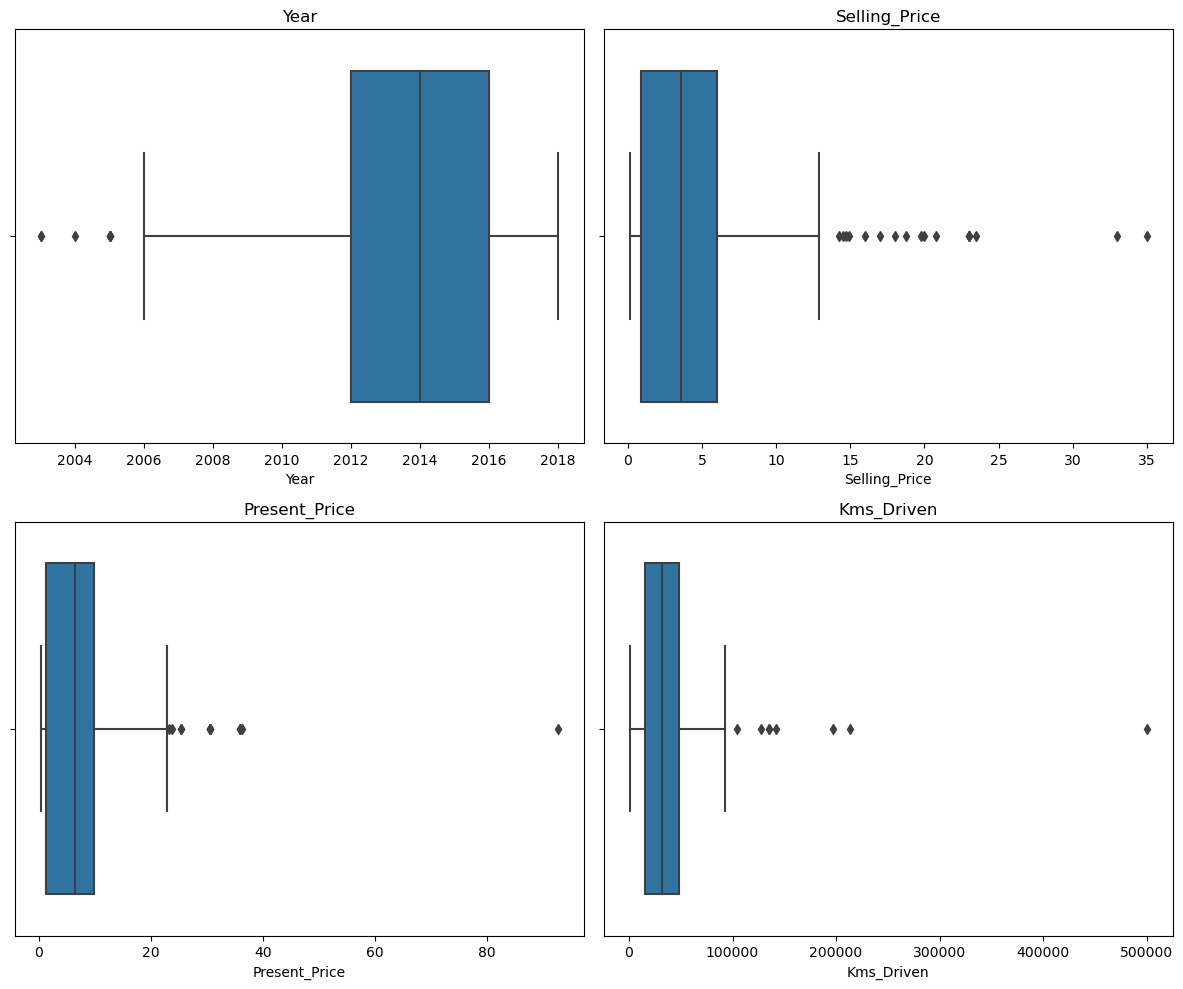

In [26]:
num_columns = df[["Year","Selling_Price","Present_Price","Kms_Driven"]].copy()
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
for i,column in enumerate(num_columns.columns):
    row , col = divmod(i,2)
    sns.boxplot(x=num_columns[column],ax=axs[row,col])
    axs[row,col].set_title(column)
plt.tight_layout()
plt.show()
    

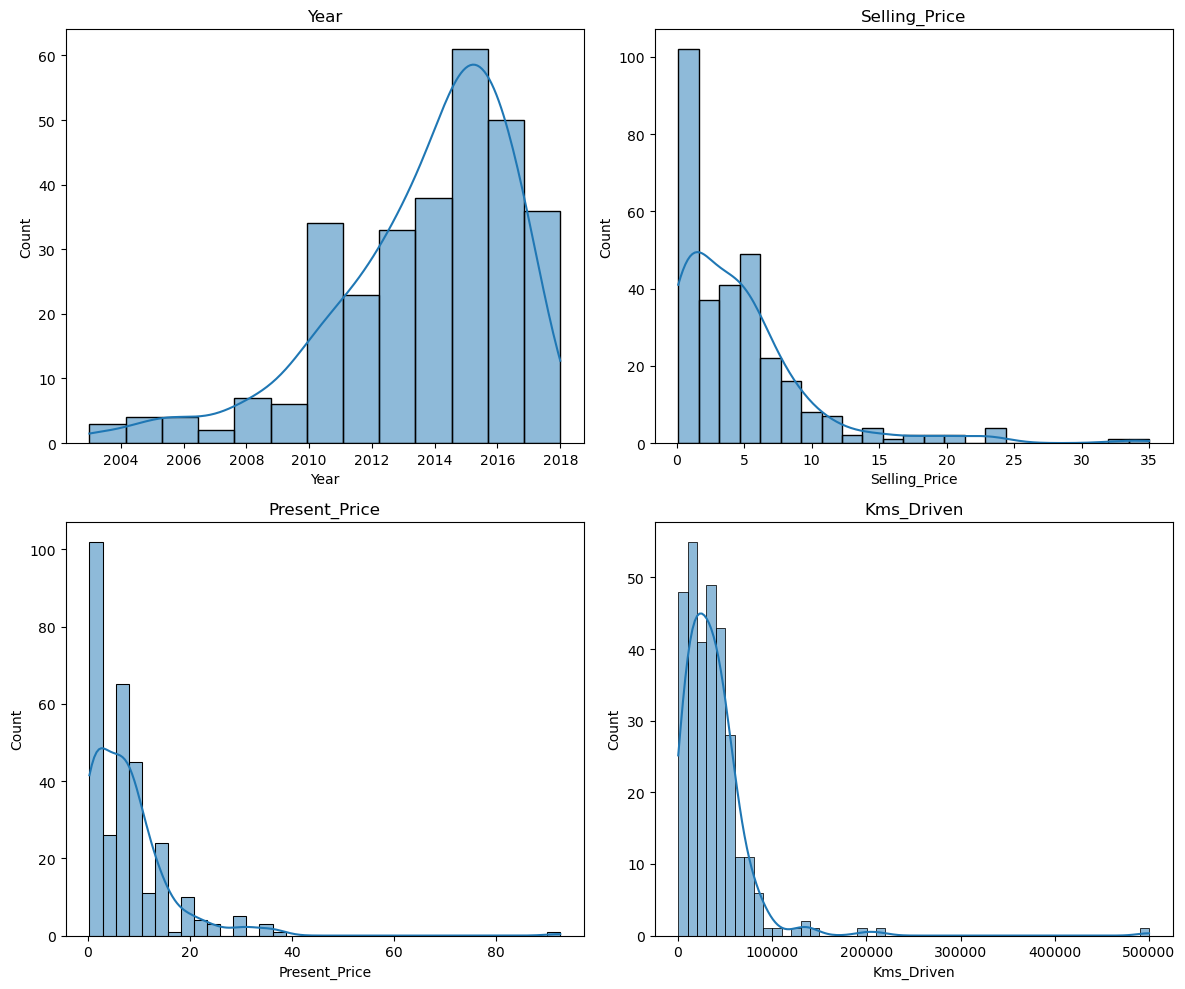

In [28]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
for i,coll in enumerate(num_columns.columns):
    row,col = divmod(i,2)
    sns.histplot(x=num_columns[coll],ax=axs[row,col],kde=True)
    axs[row,col].set_title(coll)
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


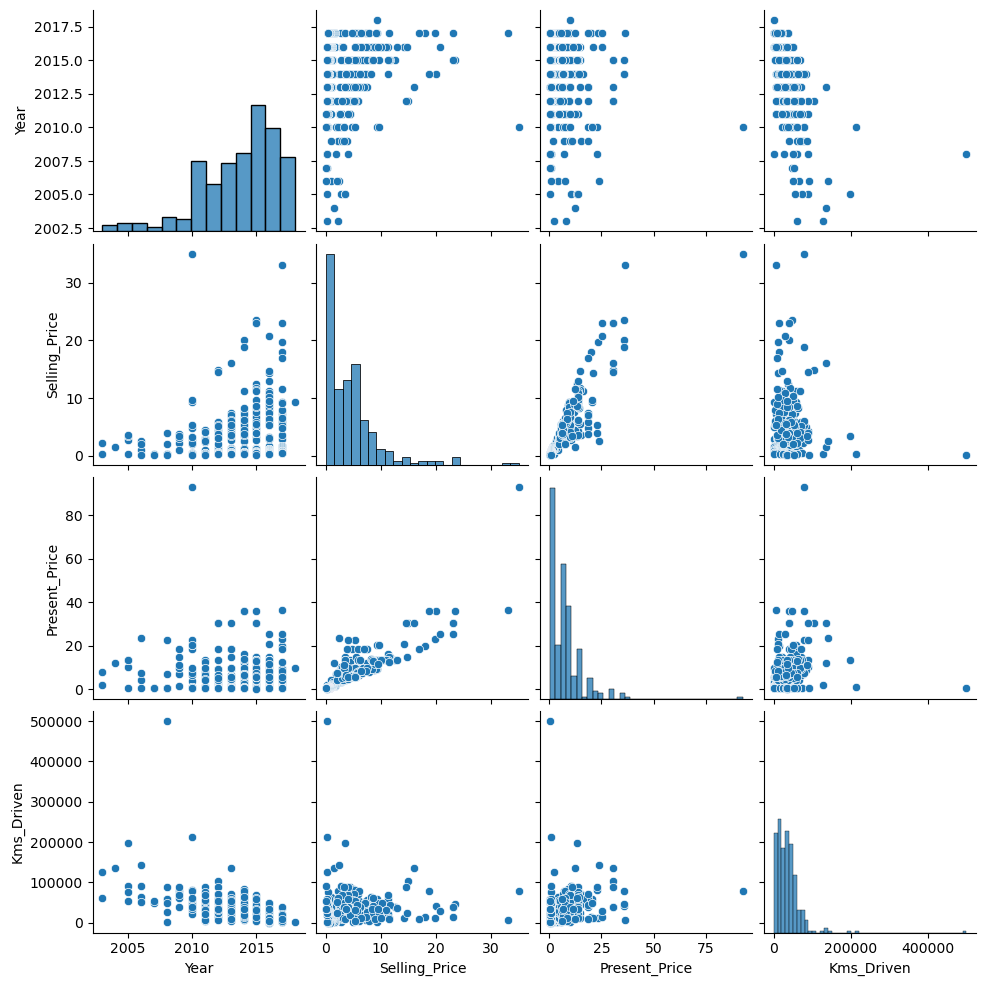

In [31]:
sns.pairplot(num_columns)
plt.show()

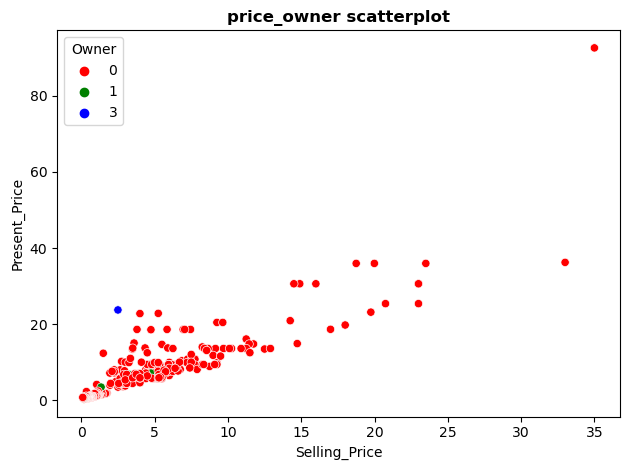

In [38]:
sns.scatterplot(x=df['Selling_Price'],y=df['Present_Price'],hue=df['Owner'],palette=["r","g","b"])
plt.title("price_owner scatterplot",fontweight="bold")
plt.tight_layout()
plt.show()

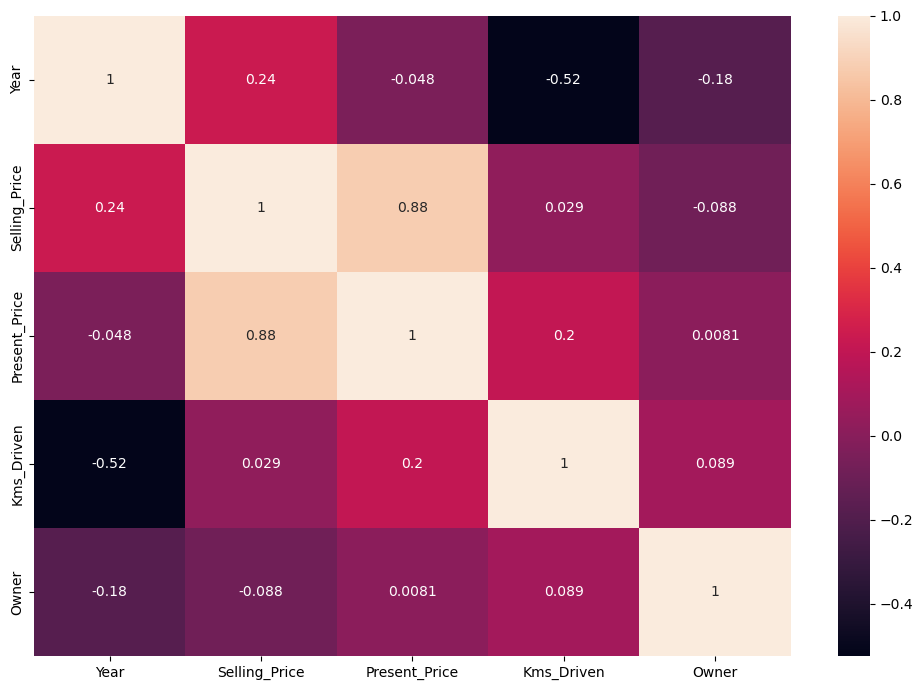

In [49]:
corr1 = df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr1,annot=True)
plt.tight_layout()
plt.show()

Encoded_df

In [52]:
encoded_df = df.copy()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
column_to_encode =["Car_Name","Fuel_Type","Seller_Type","Transmission"] 
for column in column_to_encode:
    encoded_df[column] = encoder.fit_transform(encoded_df[column])
    


In [54]:
encoded_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


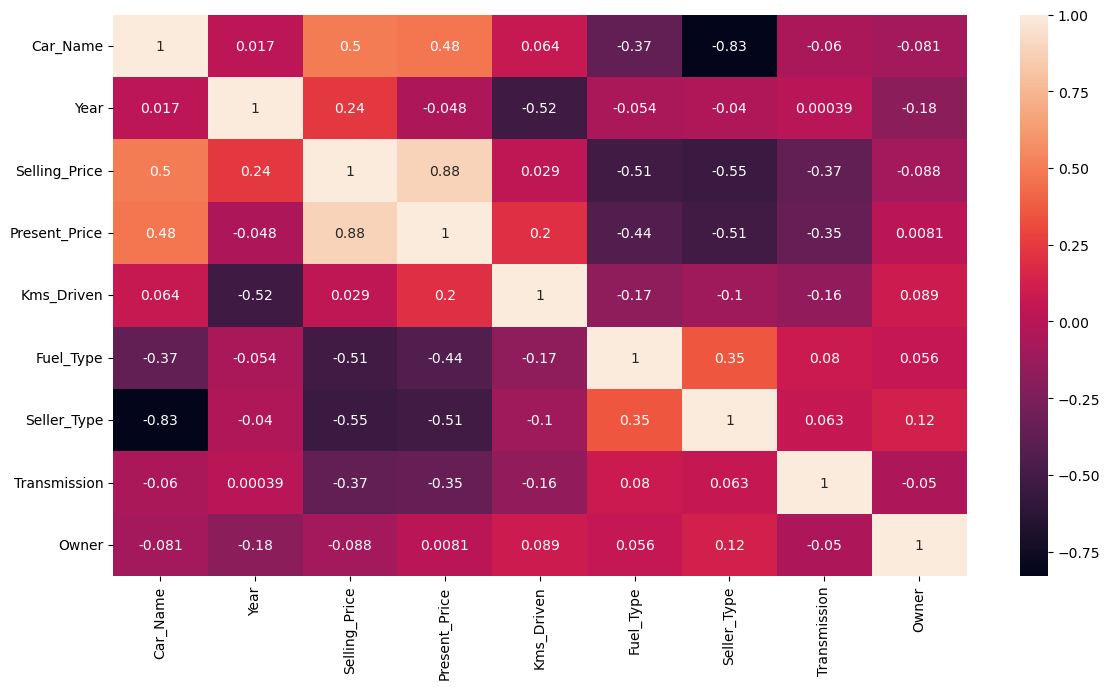

In [56]:
corr2 = encoded_df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr2,annot=True)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x = encoded_df.drop("Selling_Price",axis=1)
y = encoded_df['Selling_Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)
forest1 = RandomForestRegressor()
forest1.fit(x_train,y_train)
 

RandomForestRegressor()

In [67]:
forest1.score(x_test,y_test)

0.9623995826309696

In [71]:
check1 = pd.DataFrame({"Actual":y_test,"predict":forest1.predict(x_test)})


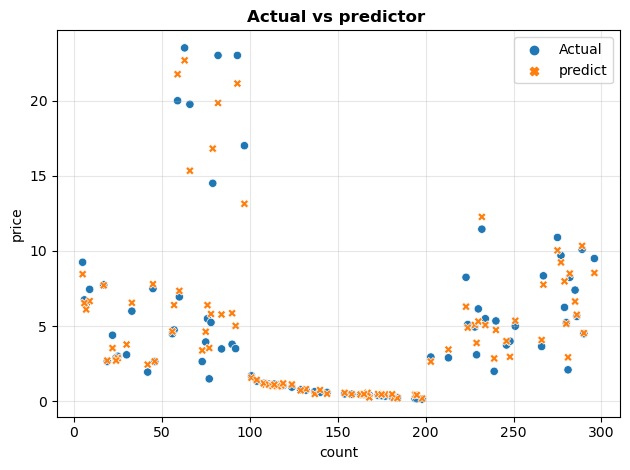

,Actual,predict
0,0.35,0.4710
1,10.11,10.3389
2,4.95,5.0825
3,0.15,0.1933
4,6.95,7.3473
...,...,...
86,1.05,1.1971
87,2.65,2.7140
88,0.30,0.4751
89,14.50,16.8070


In [83]:
sns.scatterplot(check1)
plt.grid(True,alpha = 0.3)
plt.title("Actual vs predictor ",fontweight= "bold")
plt.xlabel("count")
plt.ylabel("price")
plt.tight_layout()
plt.show()
display(check1.reset_index(drop=True))

forecast selling price without present price

In [100]:
x1 = encoded_df.drop(["Selling_Price","Present_Price"],axis=1)
y1 = encoded_df['Selling_Price']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.2,random_state=42)
forest2 = RandomForestRegressor()
forest2.fit(x1_train,y1_train)


RandomForestRegressor()

In [101]:
forest2.score(x1_test,y1_test)

0.9303195177253425

In [103]:
check2 = pd.DataFrame({"Actual":y1_test,"prediction":forest2.predict(x1_test)})

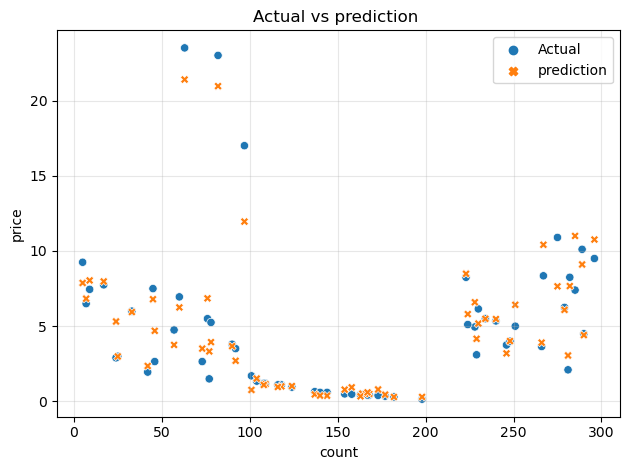

,Actual,prediction
0,0.35,0.4527
1,10.11,9.1029
2,4.95,6.5924
3,0.15,0.3010
4,6.95,6.2495
...,...,...
56,5.50,5.4910
57,9.50,10.7593
58,2.10,3.0530
59,7.40,11.0020


In [107]:
sns.scatterplot(check2)
plt.grid(True,alpha=.3)
plt.title("Actual vs prediction ")
plt.xlabel("count")
plt.ylabel("price")
plt.tight_layout()
plt.show()
display(check2.reset_index(drop=True))